In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset/dataset_final.csv")
print("Number of rows in the dataset:", len(dataset))

pd.set_option('display.max_columns', None)
dataset.head(10)

Number of rows in the dataset: 52160


,Time,Driver,LapTime,LapNumber,Stint,Compound,TyreLife,FreshTyre,Team,RoundNumber,EventName,Session,EventYear,TimeWeather,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,FuelLevel
0,1863.689,VER,91.295,3.0,2.0,SOFT,3.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,1841.346,24.2,16.0,1017.5,False,28.7,352,0.6,2.0
1,3315.214,VER,90.503,8.0,4.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0
2,4551.213,VER,89.897,11.0,5.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,4541.500,23.1,31.0,1017.7,False,26.9,338,1.3,2.0
3,5034.472,VER,89.708,14.0,6.0,SOFT,2.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,5021.569,23.0,33.0,1017.9,False,26.6,329,0.8,2.0
4,1926.785,PER,91.479,3.0,2.0,SOFT,3.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,1901.344,24.3,16.0,1017.5,False,28.7,333,0.4,2.0
5,3322.843,PER,90.746,8.0,4.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0
6,4557.035,PER,90.131,11.0,5.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,4541.500,23.1,31.0,1017.7,False,26.9,338,1.3,2.0
7,5040.743,PER,89.846,14.0,6.0,SOFT,2.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,5021.569,23.0,33.0,1017.9,False,26.6,329,0.8,2.0
8,1899.739,LEC,91.094,5.0,2.0,SOFT,2.0,True,Ferrari,1,Bahrain Grand Prix,Qualifying,2023,1841.346,24.2,16.0,1017.5,False,28.7,352,0.6,2.0
9,3301.222,LEC,91.699,10.0,4.0,SOFT,7.0,False,Ferrari,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0


In [3]:
dataset.columns

Index(['Time', 'Driver', 'LapTime', 'LapNumber', 'Stint', 'Compound',
       'TyreLife', 'FreshTyre', 'Team', 'RoundNumber', 'EventName', 'Session',
       'EventYear', 'TimeWeather', 'AirTemp', 'Humidity', 'Pressure',
       'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'FuelLevel'],
      dtype='object')

In [4]:
# Standardization of original data points (mean 0 and std dev 1)
def standardize(x):
    x = x - np.mean(x)
    x = x / np.std(x)
    return x

# Destandardizatio of a standard data points 
def destandardize(z, mean, std):
    return z * std + mean

# Manual one-hot encoding. Input: list or np array of strings
# La funzione one_hot_encode esegue la codifica one-hot di una variabile categorica rappresentata da una lista o array di stringhe.
# Prende in input una sequenza di valori, identifica tutte le categorie uniche e restituisce una matrice numpy in cui ogni riga rappresenta un valore di input codificato come vettore binario (one-hot).
def one_hot_encode(values):
    unique = sorted(set(values))
    one_hot = np.zeros((len(values), len(unique)))
    for i, val in enumerate(values):
        one_hot[i][unique.index(val)] = 1
    return one_hot

# Get of regression data in matrix form
def build_model_data(X, y):
    b = y
    num_samples = len(b)
    A = np.c_[np.ones(num_samples), X]
    return A, b

# Extraction of input variables from the dataset
lap_time = dataset['LapTime']
event_name = dataset['EventName'] 
team = dataset['Team']
compound = dataset['Compound']
tyre_life = dataset['TyreLife'] 
fresh_tyre = dataset['FreshTyre'] 
fuel_level = dataset['FuelLevel']
air_temp = dataset['AirTemp']
humidity = dataset['Humidity'] 
pressure = dataset['Pressure']
rainfall = dataset['Rainfall'] 
track_temp = dataset['TrackTemp'] 
wind_direction = dataset['WindDirection'] 
wind_speed = dataset['WindSpeed'] 

# One-hot encoding of categorical variables
event_oh = one_hot_encode(event_name)
team_oh = one_hot_encode(team)
compound_oh = one_hot_encode(compound)
fresh_tyre_oh = one_hot_encode(fresh_tyre)
rainfall_oh = one_hot_encode(rainfall)

# Standardization of numerical variables
X_num = np.c_[
    standardize(tyre_life),
    standardize(air_temp),
    standardize(humidity),
    standardize(pressure),
    standardize(track_temp),
    standardize(wind_direction),
    standardize(wind_speed),
    standardize(fuel_level)
]

# Concatenation of all features
X = np.c_[event_oh, team_oh, compound_oh, fresh_tyre_oh, rainfall_oh, X_num]

mu_lap_time = np.mean(lap_time)
std_lap_time = np.std(lap_time)

# Model build
A, b = build_model_data(X, standardize(lap_time))


## Least Squares Error: Theoretical Formula

The **least squares error** for a linear system is defined as:

$$
f(x) = \|Ax - b\|^2 = (Ax - b)^T (Ax - b)
$$

where:
- $A$ is an $m \times n$ matrix of input data,
- $x$ is an $n$-dimensional vector of parameters,
- $b$ is an $m$-dimensional vector of observations.

---

## Why the Assumptions Hold

### 1. Convexity
The function $f(x) = \|Ax - b\|^2$ is **convex** because it is a quadratic function with a positive semi-definite Hessian matrix. Specifically, the Hessian is $2A^T A$, which is always positive semi-definite for any real matrix $A$. This guarantees that any local minimum is also a global minimum.

### 2. Differentiability
The least squares error function is **differentiable** everywhere with respect to $x$ because it is a composition of linear and quadratic (polynomial) operations, both of which are smooth and differentiable.

### 3. Existence of a Global Minimum $x^*$
Due to convexity, the function has a unique global minimum (or a set of minima if the solution is not unique). The minimum is given by the solution to the normal equations:

$$
A^T A x^* = A^T b
$$

If $A^T A$ is invertible, the unique solution is:

$$
x^* = (A^T A)^{-1}A^T b
$$

If $A^T A$ is not invertible, the set of minimizers is still convex and the minimum value is still achieved.

---

**Summary:**  
The least squares error function is convex and differentiable, ensuring that any stationary point is a global minimum. The global minimizer $x^*$ can be found analytically, and the function's structure guarantees these properties.

In [ ]:
def loss_function(A, x, b):
    """Computes the quadratic objective function f(x) = ||A x - b||²."""
    return np.sum((A @ x - b) ** 2)


## Gradient Descent

### Definition

Gradient descent is an iterative optimization algorithm used to find a point $x^*$ that is (close to) a global minimum of a differentiable, convex function $f : \mathbb{R}^d \to \mathbb{R}$.

**Assumptions:**
- $f : \mathbb{R}^d \to \mathbb{R}$ is convex and differentiable.
- $f$ has at least one global minimum $x^*$.

**Goal:**
Find $x^* \in \mathbb{R}^d$ such that
$$
f(x) - f(x^*) \leq \varepsilon
$$
for a given tolerance $\varepsilon > 0$.

> **Note:** There can be multiple global minima $x^*_1, x^*_2$ with $f(x^*_1) = f(x^*_2)$.

---

### Iterative Algorithm

1. **Choose an initial point:** $x_0 \in \mathbb{R}^d$.
2. **Update rule:** For time steps $t = 0, 1, 2, \ldots$, update
   $$
   x_{t+1} := x_t - \gamma \nabla f(x_t)
   $$
   where $\gamma \geq 0$ is the step size (learning rate).

Repeat the update until convergence (i.e., until $f(x_t)$ is sufficiently close to $f(x^*)$ or the change in $x_t$ is below a threshold).

---

**Summary:**  
Gradient descent iteratively moves in the direction of the negative gradient of $f$ to approach a global minimum, under the assumption that $f$ is convex and differentiable.

In [69]:
def loss_function(A, x, b):
    """Computes the quadratic objective function f(x) = ||A x - b||²."""
    return np.sum((A @ x - b) ** 2)

def compute_gradient(A, x, b):
    """Computes the gradient of the objective function."""
    residual = A @ x - b
    gradient = 2 * A.T @ residual
    return gradient

def compute_optimal_solution(A, b):
    """
    Computes the optimal solution x* that minimizes the loss function,
    using the normal equations: (Aᵗ A) x = Aᵗ b
    """
    return np.linalg.solve(A.T @ A, A.T @ b)

def gradient_descent(A, b, x0, learning_rate=0.01, epsilon=None, max_steps=10000, verbose=True):
    """
    Performs gradient descent on the objective function f(x) = ||A x - b||²
    until the condition f(x) - f(x*) <= epsilon is met or divergence is detected.

    Returns:
        objectives (list): Sequence of objective function values for each step
        history (list): Sequence of x values for each step
    """
    x = x0.copy()
    x_star = compute_optimal_solution(A, b)
    f_star = loss_function(A, x_star, b)

    if epsilon is None:
        epsilon = 1e-6 * f_star
        if verbose:
            print(f"[INFO] epsilon not provided: using relative threshold -> epsilon = {epsilon:.2e}")

    history = [x.copy()]
    objectives = [loss_function(A, x, b)]
    best_f = float('inf')
    best_step = -1

    for step in range(max_steps):
        gradient = compute_gradient(A, x, b)
        x = x - learning_rate * gradient
        f_x = loss_function(A, x, b)
        delta = f_x - f_star

        # Divergence check
        if np.isnan(f_x) or np.isinf(f_x) or abs(f_x) > 1e20:
            print(f"[DIVERGENCE] Stopped at step {step}: f(x) = {f_x}")
            x = np.full_like(x, np.inf)
            history.append(x.copy())
            objectives.append(np.inf)
            return objectives, history

        if f_x < best_f:
            best_f = f_x
            best_step = step

        if verbose:
            print(f"[STEP {step:4d}] f(x) = {f_x:.5f} | f(x*) = {f_star:.5f} | Δ = {delta:.2e} | ||grad|| = {np.linalg.norm(gradient):.2e}")

        history.append(x.copy())
        objectives.append(f_x)
        if delta <= epsilon:
            print(f"[CONVERGENCE] Reached at step {step}: f(x) - f(x*) = {delta:.6e} <= {epsilon}")
            break
    else:
        print(f"[STOP] Max steps reached: f(x) - f(x*) = {delta:.6e} > {epsilon}")

    print(f"[RESULT] Best f(x) = {best_f:.5f} found at step {best_step}")

    return objectives, history

In [70]:
epsilon = 1e-6  
learning_rate = 1e-6
max_steps = 1000 

x0 = np.zeros(A.shape[1])

obj_GD_naive, xs_GD_naive = gradient_descent(A, b, x0, learning_rate, epsilon, max_steps)

[STEP    0] f(x) = 50501.21790 | f(x*) = 2030.82027 | Δ = 4.85e+04 | ||grad|| = 4.17e+04
[STEP    1] f(x) = 49115.69531 | f(x*) = 2030.82027 | Δ = 4.71e+04 | ||grad|| = 3.80e+04
[STEP    2] f(x) = 47935.87598 | f(x*) = 2030.82027 | Δ = 4.59e+04 | ||grad|| = 3.50e+04
[STEP    3] f(x) = 46913.19235 | f(x*) = 2030.82027 | Δ = 4.49e+04 | ||grad|| = 3.25e+04
[STEP    4] f(x) = 46012.22059 | f(x*) = 2030.82027 | Δ = 4.40e+04 | ||grad|| = 3.05e+04
[STEP    5] f(x) = 45206.78020 | f(x*) = 2030.82027 | Δ = 4.32e+04 | ||grad|| = 2.88e+04
[STEP    6] f(x) = 44477.28729 | f(x*) = 2030.82027 | Δ = 4.24e+04 | ||grad|| = 2.73e+04
[STEP    7] f(x) = 43808.92931 | f(x*) = 2030.82027 | Δ = 4.18e+04 | ||grad|| = 2.61e+04
[STEP    8] f(x) = 43190.38708 | f(x*) = 2030.82027 | Δ = 4.12e+04 | ||grad|| = 2.51e+04
[STEP    9] f(x) = 42612.92726 | f(x*) = 2030.82027 | Δ = 4.06e+04 | ||grad|| = 2.42e+04
[STEP   10] f(x) = 42069.74954 | f(x*) = 2030.82027 | Δ = 4.00e+04 | ||grad|| = 2.35e+04
[STEP   11] f(x) = 41

In [71]:
def mean_squared_error(y_true, y_pred):
    """Compute the Mean Squared Error (MSE) between true and predicted values."""
    n = len(y_true)
    mse = np.sum((y_true - y_pred)**2) / n
    return mse

def root_mean_squared_error(y_true, y_pred):
    """Compute the Root Mean Squared Error (RMSE) between true and predicted values."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def r2_score(y_true, y_pred):
    """Compute the coefficient of determination R² between true and predicted values."""
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def get_results(A, b, x_final):
    # Compute predictions in the standardized space
    y_pred = A.dot(x_final)
    # Destandardize predictions and targets to original units (seconds)
    y_pred_denorm = y_pred * std_lap_time + mu_lap_time
    b_denorm = b * std_lap_time + mu_lap_time

    mse = mean_squared_error(b_denorm, y_pred_denorm)
    rmse = root_mean_squared_error(b_denorm, y_pred_denorm)
    r2 = r2_score(b_denorm, y_pred_denorm)

    print(f"R2:   {r2:.3f}")
    print(f"MSE:  {mse:.3f} s²")
    print(f"RMSE: {rmse:.3f} s")

In [72]:
x_final = xs_GD_naive[-1]
get_results(A, b, x_final)

R2:   0.953
MSE:  5.558 s²
RMSE: 2.357 s


In [73]:
def plot_objective(objectives, gamma):
    """Plot the objective function values during gradient descent."""
    plt.figure(figsize=(8, 5))
    plt.plot(objectives, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Objective ||Ax - b||²')
    plt.ylim(0)
    plt.title(f'Gradient Descent Convergence (gamma = {gamma})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

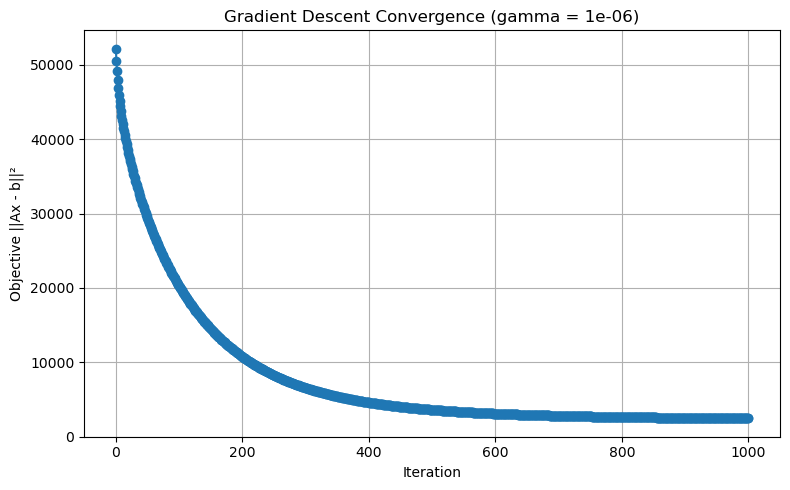

In [75]:
plot_objective(obj_GD_naive, learning_rate)